# LEADS CASE STUDY 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

## DATA UNDERSTANDING AND EDA

In [2]:
df = pd.read_csv(r"C:\Users\kashr\Downloads\Lead Scoring Assignment\Leads.csv")
df.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df[df.City == 'Select'].head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
12,8bf76a52-2478-476b-8618-1688e07874ad,660562,API,Organic Search,No,No,1,11.0,1538,11.0,...,No,Potential Lead,Select,01.High,02.Medium,16.0,16.0,No,No,Modified
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.0,...,No,Select,Select,01.High,01.High,16.0,17.0,No,No,Email Bounced
15,25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f,660547,API,Organic Search,No,No,1,6.0,1012,6.0,...,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Email Opened


In [8]:
df = df.replace('Select' , np.nan)

In [9]:
#checking null values in each rows
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
round(100*(df.isnull().sum())/len(df.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
#dropping cols with more than 38% missing values
df1 = df.copy()
df1 = df1.drop(['How did you hear about X Education' , 'Lead Quality' , 'Lead Profile' , 'City' , 
                'Asymmetrique Activity Index','Asymmetrique Profile Index', 
                'Asymmetrique Activity Score','Asymmetrique Profile Score' ] , axis = 1)

In [13]:
round(100*(df1.isnull().sum())/len(df1.index),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
df1.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [15]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India
def countries (x) :
    if x == 'India' :
        category = 'India'
    else :
        category = 'out of India'
    return category

In [16]:
df1.Country = df1.Country.apply(countries)
df1.Country.value_counts()

Country
India           6492
out of India    2748
Name: count, dtype: int64

In [17]:
df1.Specialization.value_counts(
    dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [18]:
df2 = df1.copy()

In [19]:
df2['Specialization'].value_counts(dropna = False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
dict_specializations = {'Finance Management'  : 'management_specialization' , 'Human Resource Management'  : 'management_specialization' ,
                       'Operations Management'  : 'management_specialization' , 'Healthcare Management'  : 'management_specialization',
                       'IT Projects Management' : 'management_specialization' ,'Supply Chain Management' : 'management_specialization'  , 
                        'Marketing Management' : 'management_specialization' ,
                       'Hospitality Management' : 'management_specialization' ,'Retail Management'  : 'management_specialization' ,
                       'International Business' : 'business_specialization', 'Business Administration' : 'business_specialization', 
                       'Rural and Agribusiness' : 'business_specialization', 'E-Business' : 'business_specialization'  ,
                       'Retail Management' :'industry_specialization' , 'E-COMMERCE' :'industry_specialization', 
                       'Travel and Tourism' :'industry_specialization' , 'Media and Advertising' : 'industry_specialization' ,
                       'Banking, Investment And Insurance' : 'industry_specialization', 'Services Excellence' :'industry_specialization' }

In [21]:
#categorising the values for easy interpretation
df2['Specialization'] = df2['Specialization'].replace(dict_specializations)
df2['Specialization'].value_counts(dropna = False)

Specialization
management_specialization    4153
NaN                          3380
industry_specialization       996
business_specialization       711
Name: count, dtype: int64

In [22]:
df2['Specialization'].value_counts(normalize = True)

Specialization
management_specialization    0.708703
industry_specialization      0.169966
business_specialization      0.121331
Name: proportion, dtype: float64

In [23]:
#fillling na values with most occuring ones based on probabilities
df2['Specialization'] = df2['Specialization'].fillna(pd.Series(np.random.choice(['management_specialization' ,
                        'industry_specialization' ,'business_specialization' ] , p = [0.708703 , 0.169966 , 0.121331] , size = len(df2))))
df2['Specialization'].value_counts()                                                     

Specialization
management_specialization    6549
industry_specialization      1549
business_specialization      1142
Name: count, dtype: int64

In [24]:
df2.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [25]:
df2['What is your current occupation'].value_counts( normalize = True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

In [26]:
#fillling na values with most occuring ones based on probability
df2['What is your current occupation'] = df2['What is your current occupation'].fillna(pd.Series (np.random.choice([
                                        'Unemployed','Working Professional','Student','Other' ,'Housewife' ,'Businessman']
                                         , p = [ 0.854962,0.107786,0.032061 ,0.002443,0.001527,0.001221] ,size = len(df2))))
df2['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              7898
Working Professional    1003
Student                  290
Other                     24
Housewife                 14
Businessman               11
Name: count, dtype: int64

In [27]:
#fillling na values with most occuring ones
df2['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [28]:
#fillling na values with most occuring ones
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('Better Career Prospects')
df2['What matters most to you in choosing a course'].value_counts(dropna = False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [29]:
df2['Tags'].value_counts(normalize =True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

In [30]:
#fillling na values with most occuring ones
df2['Tags'] = df2['Tags'].fillna(pd.Series(np.random.choice(['Will revert after reading the email' , 'Ringing' ] ,
                 p = [0.65 , 0.35] , size = len(df2))))
df2.Tags.value_counts(dropna = False)

Tags
Will revert after reading the email                  4246
Ringing                                              2382
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [31]:
df2['TotalVisits'].value_counts().head(2)

TotalVisits
0.0    2189
2.0    1680
Name: count, dtype: int64

In [32]:
#fillling na values with most occuring ones
df2['Last Activity'] = df2['Last Activity'].fillna('Email Opened')
df2['Lead Source'] = df2['Lead Source'].fillna('Google')
df2['Page Views Per Visit'] = df2['Page Views Per Visit'].fillna(0.00)
df2['TotalVisits'] = df2['TotalVisits'].fillna(0.00)
df2['Last Activity'] = df2['Last Activity'].fillna('Email Opened')

In [33]:
df2.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [34]:
df2.shape

(9240, 29)

In [35]:
df2 = df2.drop(['Prospect ID'] , axis = 1)
df2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [36]:
#chcecking for unique values
for col in df2 :
    print(f'{col} : {df2[col].unique()}')

Lead Number : [660737 660728 660727 ... 579545 579538 579533]
Lead Origin : ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source : ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email : ['No' 'Yes']
Do Not Call : ['No' 'Yes']
Converted : [0 1]
TotalVisits : [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55. 141.
  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website : [   0  674 1532 ...  603  483  927]
Page Views Per Visit : [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   

In [37]:
#making dummy values for categorical data
df3 = df2.copy()
dummy = pd.get_dummies(df3[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 
                            'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 
                            'Last Notable Activity' , 'Tags' , 'What matters most to you in choosing a course']], drop_first=True)
df3 = pd.concat([df3, dummy], axis=1)

In [38]:
df3.drop(['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 
           'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 
           'Last Notable Activity' , 'Tags' , 'What matters most to you in choosing a course'], axis = 1, inplace = True)

In [39]:
df3.columns

Index(['Lead Number', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'Search', 'Magazine', 'Newspaper Article',
       ...
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_opp hangup',
       'Tags_switched off', 'Tags_wrong number given',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other'],
      dtype='object', length=109)

In [40]:
# mapping new categorical data 
bin_cols = ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Specialization_industry_specialization',
       'Specialization_management_specialization',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Tags_Busy', 
       'Tags_Closed by Horizzon' ,                                 
       'Tags_Diploma holder (Not Eligible)' ,                      
       'Tags_Graduation in progress' ,                              
       'Tags_In confusion whether part time or DLP',              
       'Tags_Interested  in full time MBA',                      
       'Tags_Interested in Next batch',                              
       'Tags_Interested in other courses',                           
       'Tags_Lateral student',                                       
       'Tags_Lost to EINS',                                          
       'Tags_Lost to Others',                                        
       'Tags_Not doing further education',                           
       'Tags_Recognition issue (DEC approval)',                     
       'Tags_Ringing' ,                                              
       'Tags_Shall take in the next coming month',
       'Tags_Still Thinking', 'Tags_University not recognized',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_opp hangup',
       'Tags_switched off', 'Tags_wrong number given',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'What matters most to you in choosing a course_Other']

def binary_mapping (x) :
    return x.map ({ True : 1 , False : 0})

df3[bin_cols] = df3[bin_cols].apply(binary_mapping)

In [41]:
# mapping rest categorical data
def mapping (x) :
    return x.map ({'No' : 0 , 'Yes' : 1})

bin_mapping = [ 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
        'Do Not Call']

df3[bin_mapping] = df3[bin_mapping].apply(mapping) 

In [42]:
country_map = ({'India' : 1 , 'out of India' : 0}) 

df3.Country = df3.Country.replace(country_map)

In [43]:
for col in df3 :
    print(f'{col} : {df3[col].unique()}')

Lead Number : [660737 660728 660727 ... 579545 579538 579533]
Do Not Call : [0 1]
Converted : [0 1]
TotalVisits : [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55. 141.
  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]
Total Time Spent on Website : [   0  674 1532 ...  603  483  927]
Page Views Per Visit : [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.    2.25
  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75  2.8
  2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25  6.71
  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6   2.9
  1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21 12.33
  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.    3.75
  6.67  

In [44]:
df3['Last Notable Activity_Modified'].head(10)

0    1
1    0
2    0
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: Last Notable Activity_Modified, dtype: int64

In [45]:
#sanity checks to see if values are correctly mapped
df2['Last Notable Activity'].head(10)

0        Modified
1    Email Opened
2    Email Opened
3        Modified
4        Modified
5        Modified
6        Modified
7        Modified
8    Email Opened
9    Email Opened
Name: Last Notable Activity, dtype: object

In [46]:
# looking for outliers in numerical data
num = df3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
num.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


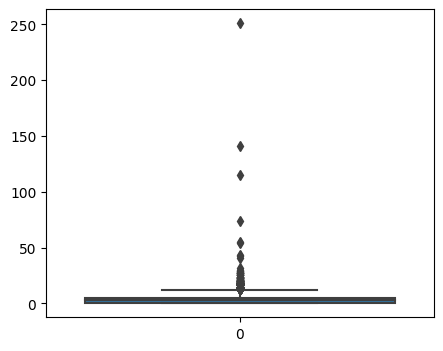

In [47]:
plt.figure(figsize = (5,4))
sns.boxplot(df3.TotalVisits)
plt.show()

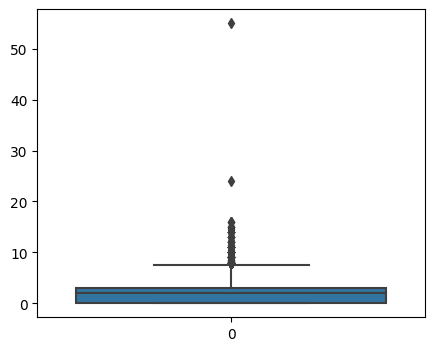

In [48]:
plt.figure(figsize = (5,4))
sns.boxplot(df3['Page Views Per Visit'])
plt.show()

In [49]:
#removing outliers from page view per visit column
df3 = df3[df3['Page Views Per Visit'] < 20 ]

In [50]:
#removing outliers from total visits column
df3 = df3[df3.TotalVisits < 60]

## VISUALISING THE DATA

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

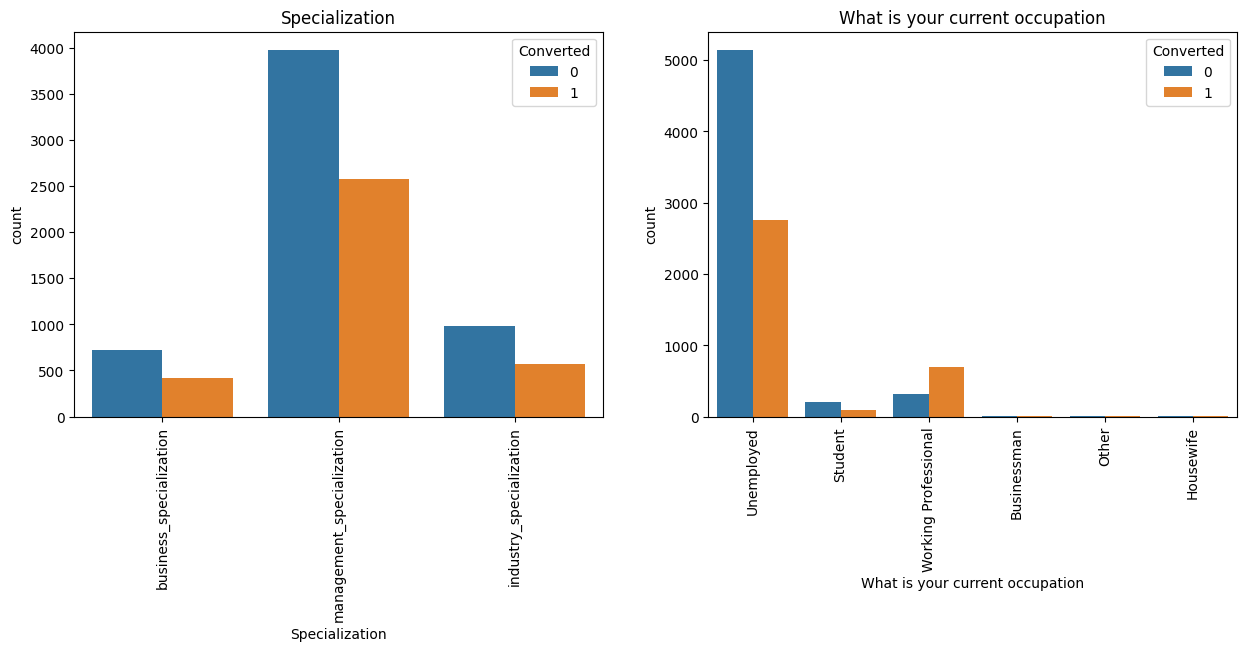

In [52]:
# visualize the data
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

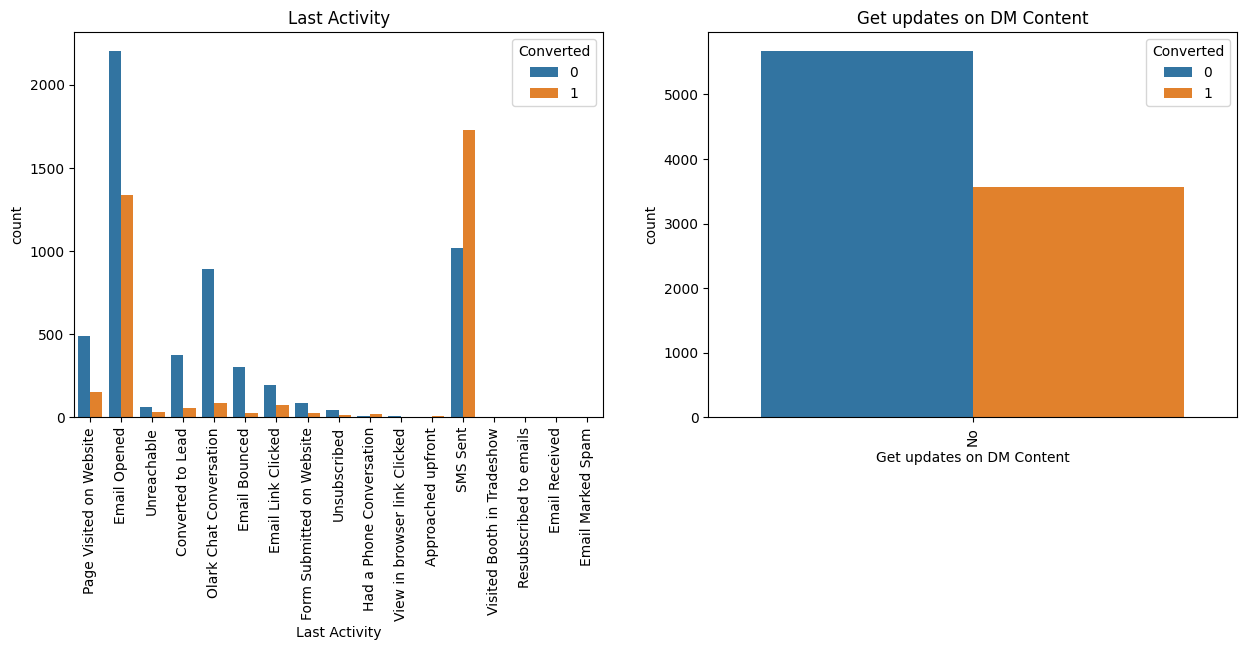

In [53]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Get updates on DM Content', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')
plt.show()

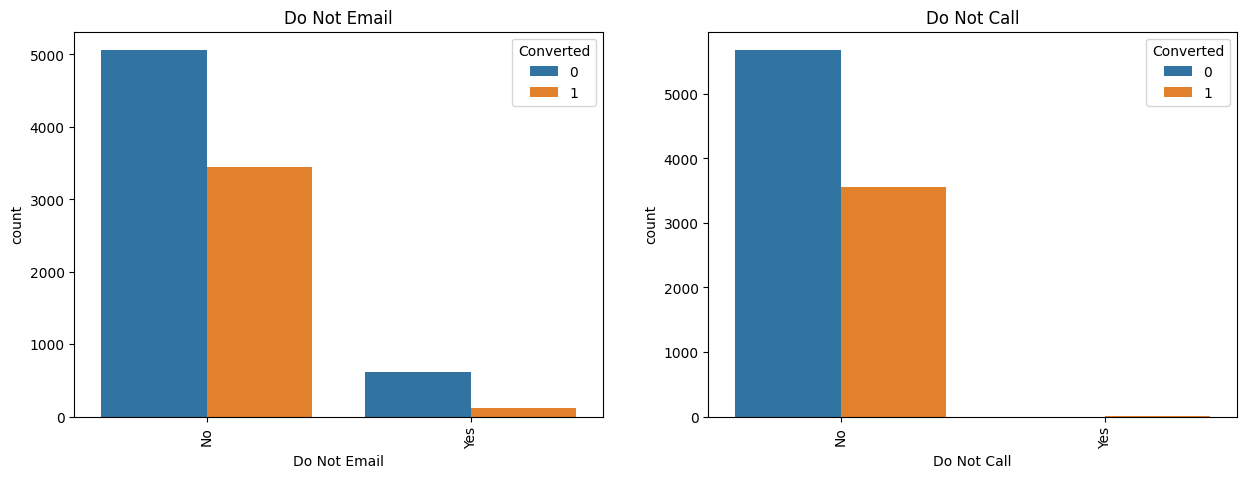

In [54]:
plt.figure(figsize=(15 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

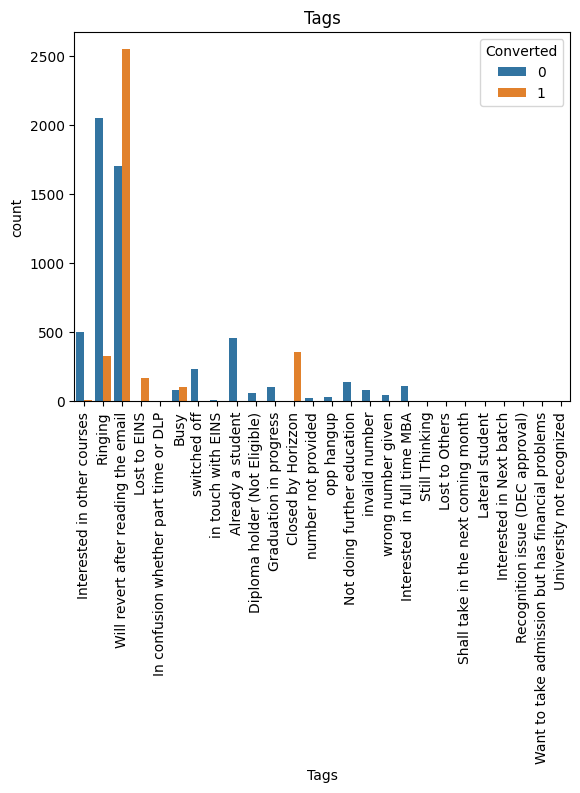

In [55]:
sns.countplot(x='Tags', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show()

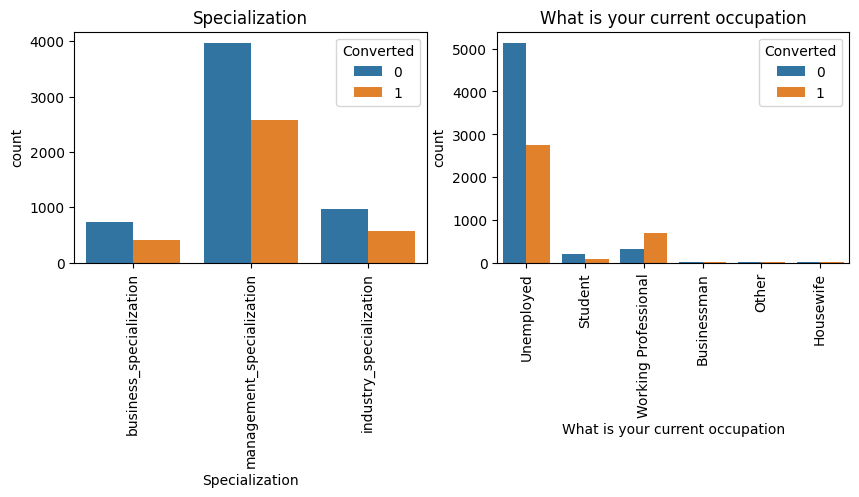

In [56]:
plt.figure(figsize = (10,3))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

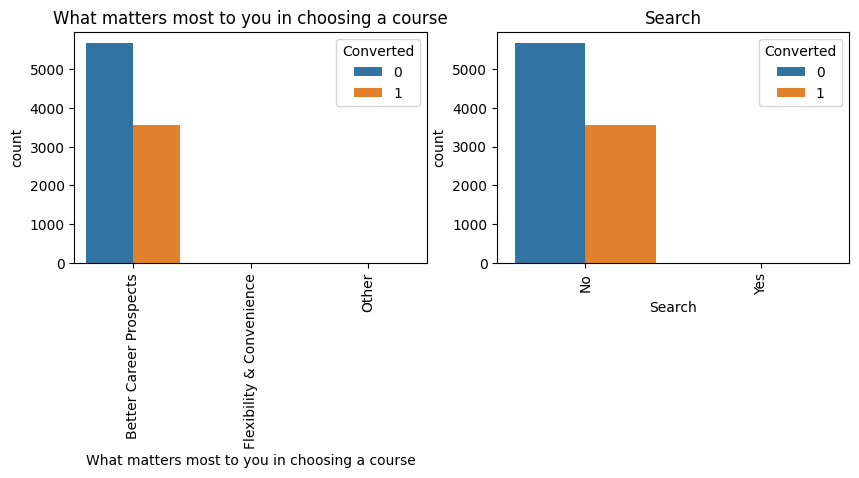

In [57]:
plt.figure(figsize = (10,3))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

Text(0.5, 1.0, 'Lead SourceS')

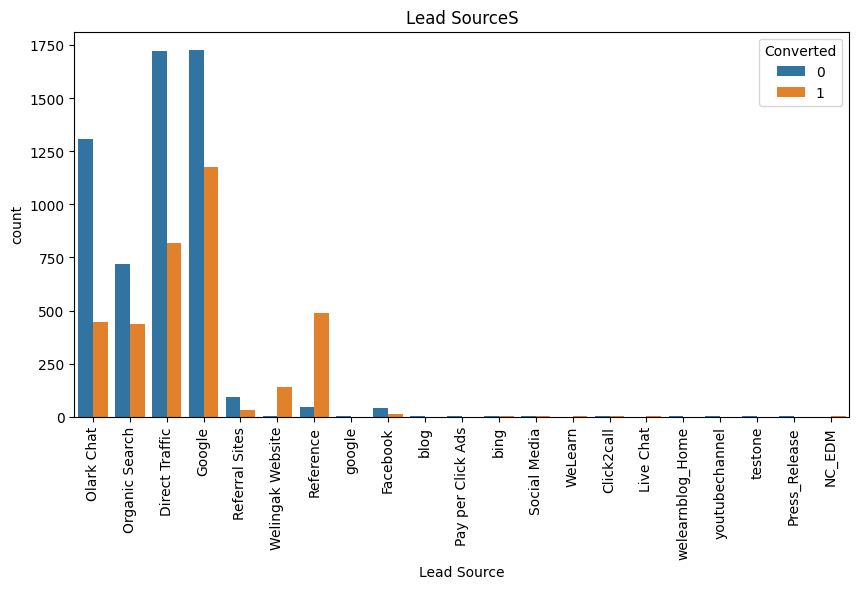

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Source', hue='Converted', data= df2).tick_params(axis='x', rotation = 90)
plt.title('Lead SourceS')

Text(0.5, 1.0, 'Total Time Spent on Website')

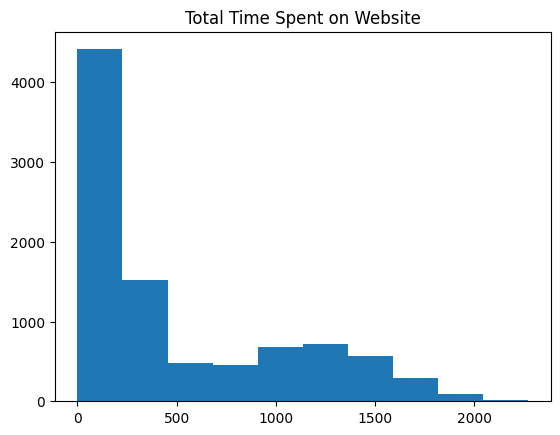

In [59]:
plt.hist(df2['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

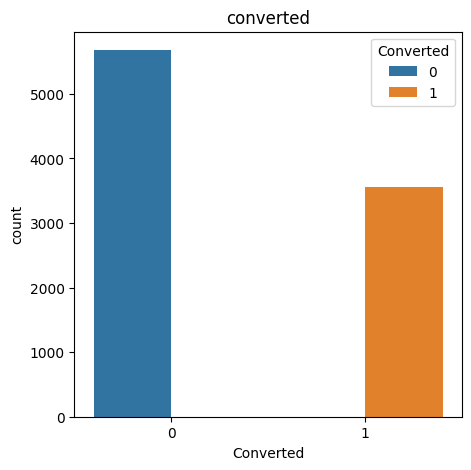

In [60]:
plt.figure(figsize = (5,5))
sns.countplot(x='Converted', hue='Converted', data= df2).tick_params(axis='x')
plt.title('converted')
plt.show()

## MODEL MAKING

In [61]:
#splitting into independent and dependent variables
df4 = df3.copy()
y = df4.pop('Converted')
X = df4

In [62]:
#splitting into train and test data
X_train , X_test , y_train , y_test = train_test_split (X , y , train_size = 0.8 , random_state = 1)
X_train.shape

(7387, 108)

In [63]:
y_test.shape

(1847,)

In [64]:
#scaling numerical data
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train
                                                       [['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7387.000000,7387.000000,7387.000000
mean,0.061928,0.214729,0.144953
std,0.066276,0.241292,0.129724
min,0.000000,0.000000,0.000000
25%,0.000000,0.004842,0.000000
50%,0.055556,0.110035,0.125000
75%,0.092593,0.409331,0.187500
max,1.000000,1.000000,1.000000


In [65]:
lr = LogisticRegression()

In [66]:
#using rfe to eliminate columns
rfe = RFE(estimator= lr, n_features_to_select= 20)
rfe.fit(X_train , y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [67]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('Lead Number', True, 1),
 ('Do Not Call', False, 59),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Country', True, 1),
 ('Search', False, 51),
 ('Magazine', False, 81),
 ('Newspaper Article', False, 82),
 ('X Education Forums', False, 84),
 ('Newspaper', False, 71),
 ('Digital Advertisement', False, 78),
 ('Through Recommendations', False, 41),
 ('Receive More Updates About Our Courses', False, 85),
 ('Update me on Supply Chain Content', False, 87),
 ('Get updates on DM Content', False, 88),
 ('I agree to pay the amount through cheque', False, 83),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 56),
 ('Specialization_industry_specialization', False, 14),
 ('Specialization_management_specialization', False, 22),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 36),
 ('L

In [68]:
#the remaining columns after rfe
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [69]:
def calculate_vif (df) :
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [70]:
#training our first model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7366
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.3
Date:                Tue, 15 Aug 2023   Deviance:                       5024.5
Time:                        14:10:33   Pearson chi2:                 8.09e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4800
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.5572      1.030     -6.369      0.000      -8.575      -4.539
Lead Number                                           6.385e-06    1.6e-06      3.983      0.000    3.24e-06    9.53e-06
Total Time Spent on Website                              4.6127      0.175     26.399      0.000       4.270       4.955
Country                                                 -0.0924      0.158     -0.586      0.558      -0.402       0.217
Lead Origin_Landing Page Submission                     -0.2160      0.105     -2.048      0.041      -0.423      -0.009
Lead Origin_Lead Add Form                                4.4750      0.421     10.629      0.000       3.650       5.300
Lead Source_Direct Traffic                              -0.2378      0.106     -2.234      0.025      -0.446      -0.029
Lead Source_Olark Chat                                   0.8593      0.184      4.666      0.000       0.498       1.220
Lead Source_Reference                                   -1.8245      0.439     -4.156      0.000      -2.685      -0.964
Do Not Email_Yes                                        -1.2791      0.162     -7.902      0.000      -1.596      -0.962
Last Activity_Olark Chat Conversation                   -1.5015      0.171     -8.771      0.000      -1.837      -1.166
Last Activity_SMS Sent                                   0.6571      0.155      4.252      0.000       0.354       0.960
What is your current occupation_Unemployed               0.0525      0.188      0.279      0.780      -0.316       0.421
What is your current occupation_Working Professional     1.0187      0.216      4.726      0.000       0.596       1.441
A free copy of Mastering The Interview_Yes               0.0480      0.104      0.461      0.644      -0.156       0.252
Last Notable Activity_Modified                          -0.6199      0.099     -6.259      0.000      -0.814      -0.426
Last Notable Activity_SMS Sent                           1.1546      0.178      6.481      0.000       0.805       1.504
Tags_Closed by Horizzon                                  6.2167      0.726      8.565      0.000       4.794       7.639
Tags_Interested in other courses                        -2.3719      0.396     -5.991      0.000      -3.148      -1.596
Tags_Ringing                                            -0.9878      0.119     -8.283      0.000      -1.222      -0.754
Tags_Will revert after reading the email                 1.5293      0.098     15.666      0.000       1.338       1.721
========================================================================================================================
"""

In [71]:
calculate_vif(X_train[col])

,features,VIF
0,Lead Number,51.13
11,What is your current occupation_Unemployed,23.41
2,Country,13.64
15,Last Notable Activity_SMS Sent,6.41
10,Last Activity_SMS Sent,6.21
4,Lead Origin_Lead Add Form,5.64
6,Lead Source_Olark Chat,4.92
3,Lead Origin_Landing Page Submission,4.83
7,Lead Source_Reference,4.11
12,What is your current occupation_Working Profes...,3.94


In [72]:
X_train_rfe = X_train[col].copy()
X_train_rfe.columns

Index(['Lead Number', 'Total Time Spent on Website', 'Country',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [73]:
X_train_rfe = X_train_rfe.drop(['Lead Number'] , axis = 1)

## MODEL 2

In [74]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7367
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.2
Date:                Tue, 15 Aug 2023   Deviance:                       5040.4
Time:                        14:10:33   Pearson chi2:                 8.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6038      0.265     -9.825      0.000      -3.123      -2.084
Total Time Spent on Website                              4.6093      0.175     26.406      0.000       4.267       4.951
Country                                                 -0.0862      0.158     -0.546      0.585      -0.395       0.223
Lead Origin_Landing Page Submission                     -0.2312      0.105     -2.194      0.028      -0.438      -0.025
Lead Origin_Lead Add Form                                4.4858      0.421     10.649      0.000       3.660       5.311
Lead Source_Direct Traffic                              -0.2850      0.106     -2.697      0.007      -0.492      -0.078
Lead Source_Olark Chat                                   0.7944      0.183      4.335      0.000       0.435       1.154
Lead Source_Reference                                   -1.8680      0.439     -4.258      0.000      -2.728      -1.008
Do Not Email_Yes                                        -1.3251      0.161     -8.224      0.000      -1.641      -1.009
Last Activity_Olark Chat Conversation                   -1.4980      0.171     -8.771      0.000      -1.833      -1.163
Last Activity_SMS Sent                                   0.6291      0.154      4.079      0.000       0.327       0.931
What is your current occupation_Unemployed               0.0705      0.187      0.376      0.707      -0.297       0.438
What is your current occupation_Working Professional     1.0253      0.215      4.764      0.000       0.603       1.447
A free copy of Mastering The Interview_Yes               0.0474      0.104      0.457      0.648      -0.156       0.251
Last Notable Activity_Modified                          -0.6110      0.099     -6.179      0.000      -0.805      -0.417
Last Notable Activity_SMS Sent                           1.1066      0.177      6.236      0.000       0.759       1.454
Tags_Closed by Horizzon                                  6.1756      0.725      8.517      0.000       4.755       7.597
Tags_Interested in other courses                        -2.3051      0.395     -5.843      0.000      -3.078      -1.532
Tags_Ringing                                            -0.9681      0.119     -8.132      0.000      -1.201      -0.735
Tags_Will revert after reading the email                 1.5645      0.097     16.106      0.000       1.374       1.755
========================================================================================================================
"""

In [75]:
calculate_vif(X_train_rfe)

,features,VIF
10,What is your current occupation_Unemployed,12.94
1,Country,9.52
14,Last Notable Activity_SMS Sent,6.40
9,Last Activity_SMS Sent,6.21
3,Lead Origin_Lead Add Form,5.04
2,Lead Origin_Landing Page Submission,4.65
6,Lead Source_Reference,4.11
18,Tags_Will revert after reading the email,3.62
5,Lead Source_Olark Chat,3.41
11,What is your current occupation_Working Profes...,2.72


In [76]:
X_train_rfe = X_train_rfe.drop(['What is your current occupation_Unemployed'] , axis = 1) 

## MODEL 3

In [77]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.3
Date:                Tue, 15 Aug 2023   Deviance:                       5040.6
Time:                        14:10:34   Pearson chi2:                 8.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4788
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5366      0.195    -12.985      0.000      -2.919      -2.154
Total Time Spent on Website                              4.6082      0.175     26.406      0.000       4.266       4.950
Country                                                 -0.0870      0.158     -0.552      0.581      -0.396       0.222
Lead Origin_Landing Page Submission                     -0.2316      0.105     -2.197      0.028      -0.438      -0.025
Lead Origin_Lead Add Form                                4.4863      0.421     10.650      0.000       3.661       5.312
Lead Source_Direct Traffic                              -0.2858      0.106     -2.706      0.007      -0.493      -0.079
Lead Source_Olark Chat                                   0.7924      0.183      4.325      0.000       0.433       1.151
Lead Source_Reference                                   -1.8730      0.439     -4.271      0.000      -2.733      -1.013
Do Not Email_Yes                                        -1.3256      0.161     -8.228      0.000      -1.641      -1.010
Last Activity_Olark Chat Conversation                   -1.4977      0.171     -8.770      0.000      -1.832      -1.163
Last Activity_SMS Sent                                   0.6303      0.154      4.088      0.000       0.328       0.932
What is your current occupation_Working Professional     0.9581      0.120      7.999      0.000       0.723       1.193
A free copy of Mastering The Interview_Yes               0.0484      0.104      0.466      0.641      -0.155       0.252
Last Notable Activity_Modified                          -0.6109      0.099     -6.178      0.000      -0.805      -0.417
Last Notable Activity_SMS Sent                           1.1074      0.177      6.241      0.000       0.760       1.455
Tags_Closed by Horizzon                                  6.1776      0.725      8.520      0.000       4.757       7.599
Tags_Interested in other courses                        -2.3030      0.394     -5.838      0.000      -3.076      -1.530
Tags_Ringing                                            -0.9653      0.119     -8.125      0.000      -1.198      -0.732
Tags_Will revert after reading the email                 1.5655      0.097     16.126      0.000       1.375       1.756
========================================================================================================================
"""

In [78]:
calculate_vif(X_train_rfe)

,features,VIF
13,Last Notable Activity_SMS Sent,6.39
9,Last Activity_SMS Sent,6.21
1,Country,6.13
3,Lead Origin_Lead Add Form,4.51
2,Lead Origin_Landing Page Submission,4.47
6,Lead Source_Reference,4.11
17,Tags_Will revert after reading the email,3.33
11,A free copy of Mastering The Interview_Yes,2.64
12,Last Notable Activity_Modified,2.45
4,Lead Source_Direct Traffic,2.37


In [79]:
X_train_rfe = X_train_rfe.drop(['Last Notable Activity_SMS Sent'] , axis = 1)

## MODEL 4

In [80]:
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM( y_train , X_train_sm , family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7369
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.1
Date:                Tue, 15 Aug 2023   Deviance:                       5080.2
Time:                        14:10:35   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4760
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4329      0.194    -12.564      0.000      -2.812      -2.053
Total Time Spent on Website                              4.6076      0.174     26.507      0.000       4.267       4.948
Country                                                 -0.0769      0.158     -0.488      0.626      -0.386       0.232
Lead Origin_Landing Page Submission                     -0.2360      0.105     -2.246      0.025      -0.442      -0.030
Lead Origin_Lead Add Form                                4.4793      0.420     10.659      0.000       3.656       5.303
Lead Source_Direct Traffic                              -0.2574      0.105     -2.453      0.014      -0.463      -0.052
Lead Source_Olark Chat                                   0.7981      0.183      4.366      0.000       0.440       1.156
Lead Source_Reference                                   -1.8851      0.437     -4.312      0.000      -2.742      -1.028
Do Not Email_Yes                                        -1.2855      0.161     -7.961      0.000      -1.602      -0.969
Last Activity_Olark Chat Conversation                   -1.3449      0.170     -7.923      0.000      -1.678      -1.012
Last Activity_SMS Sent                                   1.4596      0.078     18.610      0.000       1.306       1.613
What is your current occupation_Working Professional     0.9625      0.119      8.055      0.000       0.728       1.197
A free copy of Mastering The Interview_Yes               0.0223      0.103      0.216      0.829      -0.180       0.224
Last Notable Activity_Modified                          -0.9656      0.083    -11.622      0.000      -1.128      -0.803
Tags_Closed by Horizzon                                  6.2664      0.726      8.635      0.000       4.844       7.689
Tags_Interested in other courses                        -2.2694      0.393     -5.776      0.000      -3.040      -1.499
Tags_Ringing                                            -0.9456      0.118     -8.028      0.000      -1.177      -0.715
Tags_Will revert after reading the email                 1.5341      0.097     15.877      0.000       1.345       1.723
========================================================================================================================
"""

In [81]:
calculate_vif(X_train_rfe)

,features,VIF
1,Country,6.08
3,Lead Origin_Lead Add Form,4.49
2,Lead Origin_Landing Page Submission,4.47
6,Lead Source_Reference,4.11
16,Tags_Will revert after reading the email,3.33
11,A free copy of Mastering The Interview_Yes,2.64
4,Lead Source_Direct Traffic,2.36
0,Total Time Spent on Website,2.34
5,Lead Source_Olark Chat,2.15
15,Tags_Ringing,2.13


In [82]:
X_train_rfe = X_train_rfe.drop(['Country'], axis = 1)

## MODEL 5

In [83]:
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM( y_train , X_train_sm , family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.2
Date:                Tue, 15 Aug 2023   Deviance:                       5080.5
Time:                        14:10:36   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4760
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5031      0.130    -19.227      0.000      -2.758      -2.248
Total Time Spent on Website                              4.5998      0.173     26.580      0.000       4.261       4.939
Lead Origin_Landing Page Submission                     -0.2378      0.105     -2.264      0.024      -0.444      -0.032
Lead Origin_Lead Add Form                                4.5462      0.397     11.438      0.000       3.767       5.325
Lead Source_Direct Traffic                              -0.2524      0.104     -2.418      0.016      -0.457      -0.048
Lead Source_Olark Chat                                   0.8644      0.123      7.053      0.000       0.624       1.105
Lead Source_Reference                                   -1.8822      0.437     -4.305      0.000      -2.739      -1.025
Do Not Email_Yes                                        -1.2834      0.161     -7.951      0.000      -1.600      -0.967
Last Activity_Olark Chat Conversation                   -1.3455      0.170     -7.924      0.000      -1.678      -1.013
Last Activity_SMS Sent                                   1.4599      0.078     18.614      0.000       1.306       1.614
What is your current occupation_Working Professional     0.9643      0.119      8.073      0.000       0.730       1.198
A free copy of Mastering The Interview_Yes               0.0207      0.103      0.201      0.841      -0.181       0.223
Last Notable Activity_Modified                          -0.9647      0.083    -11.616      0.000      -1.128      -0.802
Tags_Closed by Horizzon                                  6.2664      0.726      8.634      0.000       4.844       7.689
Tags_Interested in other courses                        -2.2705      0.393     -5.779      0.000      -3.041      -1.500
Tags_Ringing                                            -0.9463      0.118     -8.035      0.000      -1.177      -0.715
Tags_Will revert after reading the email                 1.5336      0.097     15.876      0.000       1.344       1.723
========================================================================================================================
"""

In [84]:
calculate_vif(X_train_rfe)

,features,VIF
2,Lead Origin_Lead Add Form,4.35
5,Lead Source_Reference,4.11
1,Lead Origin_Landing Page Submission,3.86
15,Tags_Will revert after reading the email,2.69
10,A free copy of Mastering The Interview_Yes,2.62
3,Lead Source_Direct Traffic,2.36
0,Total Time Spent on Website,2.12
4,Lead Source_Olark Chat,1.84
11,Last Notable Activity_Modified,1.78
14,Tags_Ringing,1.72


In [85]:
X_train_rfe = X_train_rfe.drop(['Lead Origin_Lead Add Form'] , axis = 1)

## MODEL 6

In [86]:
X_train_sm = sm.add_constant(X_train_rfe)
logm6 = sm.GLM( y_train , X_train_sm , family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.5
Date:                Tue, 15 Aug 2023   Deviance:                       5327.0
Time:                        14:10:36   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4582
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0383      0.121    -16.866      0.000      -2.275      -1.801
Total Time Spent on Website                              4.1591      0.165     25.158      0.000       3.835       4.483
Lead Origin_Landing Page Submission                     -0.5898      0.100     -5.897      0.000      -0.786      -0.394
Lead Source_Direct Traffic                              -0.2764      0.102     -2.706      0.007      -0.477      -0.076
Lead Source_Olark Chat                                   0.3908      0.114      3.416      0.001       0.167       0.615
Lead Source_Reference                                    2.1761      0.218      9.980      0.000       1.749       2.604
Do Not Email_Yes                                        -1.0858      0.151     -7.184      0.000      -1.382      -0.790
Last Activity_Olark Chat Conversation                   -1.3923      0.168     -8.299      0.000      -1.721      -1.063
Last Activity_SMS Sent                                   1.5001      0.076     19.655      0.000       1.351       1.650
What is your current occupation_Working Professional     0.8849      0.118      7.503      0.000       0.654       1.116
A free copy of Mastering The Interview_Yes               0.0124      0.101      0.123      0.902      -0.185       0.210
Last Notable Activity_Modified                          -0.9677      0.081    -11.957      0.000      -1.126      -0.809
Tags_Closed by Horizzon                                  6.3637      0.724      8.795      0.000       4.946       7.782
Tags_Interested in other courses                        -2.3282      0.391     -5.953      0.000      -3.095      -1.562
Tags_Ringing                                            -0.8449      0.114     -7.426      0.000      -1.068      -0.622
Tags_Will revert after reading the email                 1.5406      0.094     16.304      0.000       1.355       1.726
========================================================================================================================
"""

In [87]:
calculate_vif(X_train_rfe)

,features,VIF
1,Lead Origin_Landing Page Submission,3.78
9,A free copy of Mastering The Interview_Yes,2.62
14,Tags_Will revert after reading the email,2.59
2,Lead Source_Direct Traffic,2.36
0,Total Time Spent on Website,2.10
3,Lead Source_Olark Chat,1.81
10,Last Notable Activity_Modified,1.77
13,Tags_Ringing,1.68
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57


In [88]:
X_train_rfe = X_train_rfe.drop(['A free copy of Mastering The Interview_Yes'] , axis = 1) 

## MODEL 7

In [89]:
X_train_sm = sm.add_constant(X_train_rfe)
logm7 = sm.GLM( y_train , X_train_sm , family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7387
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.5
Date:                Tue, 15 Aug 2023   Deviance:                       5327.1
Time:                        14:10:37   Pearson chi2:                 7.90e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4582
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0378      0.121    -16.872      0.000      -2.274      -1.801
Total Time Spent on Website                              4.1593      0.165     25.161      0.000       3.835       4.483
Lead Origin_Landing Page Submission                     -0.5859      0.095     -6.171      0.000      -0.772      -0.400
Lead Source_Direct Traffic                              -0.2708      0.091     -2.967      0.003      -0.450      -0.092
Lead Source_Olark Chat                                   0.3910      0.114      3.418      0.001       0.167       0.615
Lead Source_Reference                                    2.1760      0.218      9.980      0.000       1.749       2.603
Do Not Email_Yes                                        -1.0863      0.151     -7.191      0.000      -1.382      -0.790
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.299      0.000      -1.721      -1.063
Last Activity_SMS Sent                                   1.5004      0.076     19.664      0.000       1.351       1.650
What is your current occupation_Working Professional     0.8849      0.118      7.504      0.000       0.654       1.116
Last Notable Activity_Modified                          -0.9680      0.081    -11.964      0.000      -1.127      -0.809
Tags_Closed by Horizzon                                  6.3642      0.724      8.795      0.000       4.946       7.782
Tags_Interested in other courses                        -2.3279      0.391     -5.953      0.000      -3.094      -1.562
Tags_Ringing                                            -0.8452      0.114     -7.430      0.000      -1.068      -0.622
Tags_Will revert after reading the email                 1.5401      0.094     16.314      0.000       1.355       1.725
========================================================================================================================
"""

In [90]:
calculate_vif(X_train_rfe)

,features,VIF
1,Lead Origin_Landing Page Submission,3.26
13,Tags_Will revert after reading the email,2.58
0,Total Time Spent on Website,2.10
2,Lead Source_Direct Traffic,1.93
3,Lead Source_Olark Chat,1.80
9,Last Notable Activity_Modified,1.77
12,Tags_Ringing,1.68
6,Last Activity_Olark Chat Conversation,1.57
7,Last Activity_SMS Sent,1.57
4,Lead Source_Reference,1.41


In [91]:
X_train_rfe

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email
3811,0.082306,1,1,0,0,0,0,1,0,0,0,0,1,0
955,0.022447,0,0,0,0,0,1,0,0,1,0,1,0,0
6405,0.245599,0,0,0,0,0,0,0,0,0,0,0,0,0
6645,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1
7745,0.638204,1,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,0.596391,1,0,0,0,0,0,0,0,0,1,0,0,0
7819,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0
905,0.119278,0,0,0,0,0,0,0,0,0,0,0,1,0
5194,0.025528,0,1,0,0,0,0,1,0,1,1,0,0,0


In [92]:
#this is final model

## EVALUATING MODEL

In [93]:
#predictng on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [94]:
y_train_pred[:20]

array([0.13045149, 0.00131539, 0.26575872, 0.84268655, 0.25252632,
       0.61712268, 0.08526188, 0.09729238, 0.99606687, 0.03235072,
       0.39826055, 0.13966312, 0.1883392 , 0.29449654, 0.05841857,
       0.00364433, 0.11897572, 0.25467971, 0.27059491, 0.76153643])

In [95]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final.head()

,converted,converted_prob
0,1,0.130451
1,0,0.001315
2,0,0.265759
3,1,0.842687
4,0,0.252526


In [96]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,converted_prob,predicted
0,1,0.130451,0
1,0,0.001315,0
2,0,0.265759,0
3,1,0.842687,1
4,0,0.252526,0


In [97]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8494652768376878


In [98]:
# Creating confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.converted , y_train_pred_final.predicted)
confusion_matrix

array([[4114,  420],
       [ 692, 2161]], dtype=int64)

In [99]:
# Predicted        No         Yes
# Actual
# No              4146      418
# Yes             717      2106

In [100]:
# true positive
TP = confusion_matrix[1,1]
# true negatives
TN = confusion_matrix[0,0]
# false positives
FP = confusion_matrix[0,1] 
# false negatives
FN = confusion_matrix[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.7574483000350508

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.9073665637406264

### optimising cut-off

In [103]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )

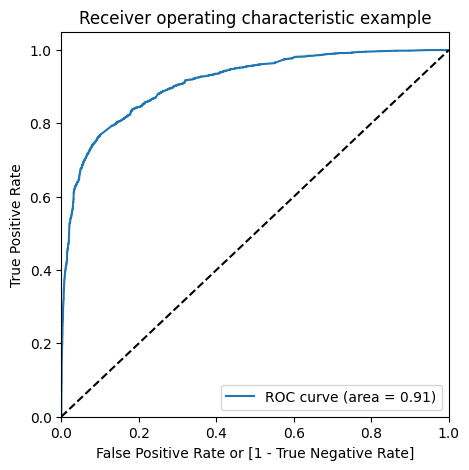

In [105]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

In [106]:
#roc = 0.91

In [107]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.130451,0,1,1,0,0,0,0,0,0,0,0
1,0,0.001315,0,1,0,0,0,0,0,0,0,0,0
2,0,0.265759,0,1,1,1,0,0,0,0,0,0,0
3,1,0.842687,1,1,1,1,1,1,1,1,1,1,0
4,0,0.252526,0,1,1,1,0,0,0,0,0,0,0


In [108]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accuracy and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386219,1.000000,0.000000
0.1,0.1,0.691620,0.953733,0.526687
0.2,0.2,0.772032,0.917631,0.680415
0.3,0.3,0.808718,0.859446,0.776798
0.4,0.4,0.827670,0.816684,0.834583
0.5,0.5,0.849465,0.757448,0.907367
0.6,0.6,0.847841,0.706975,0.936480
0.7,0.7,0.834304,0.632317,0.961403
0.8,0.8,0.802762,0.522608,0.979047
0.9,0.9,0.746988,0.356116,0.992942


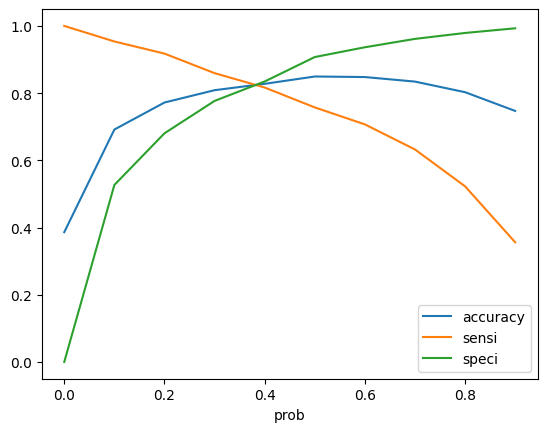

In [109]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [110]:
#cut-off from graph suggests cut-off to be 0.4

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.40 else 0 )
y_train_pred_final.head()

,converted,converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.130451,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.001315,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.265759,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.842687,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.252526,0,1,1,1,0,0,0,0,0,0,0,0


In [112]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8276702314877488

In [113]:
confusion_matrix_2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion_matrix_2

array([[3784,  750],
       [ 523, 2330]], dtype=int64)

In [114]:
# true positive
TP = confusion_matrix_2[1,1]
# true negatives
TN = confusion_matrix_2[0,0]
# false positives
FP = confusion_matrix_2[0,1] 
# false negatives
FN = confusion_matrix_2[1,0]

In [115]:
# Calculating the sensitivity
TP/(TP+FN)

0.8166841920785138

In [116]:
# Calculating the specificity
TN/(TN+FP)# Calculating the specificity
TN/(TN+FP)

0.8345831495368328

In [117]:
X_train_sm1 = X_train_sm.copy()
X_train_sm1.drop(['const'] , axis = 1 , inplace = True)

## PREDICTION ON TEST SET

In [118]:
col = X_train_sm1.columns
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.info(20)

<class 'pandas.core.frame.DataFrame'>
Index: 1847 entries, 8380 to 8100
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 1847 non-null   float64
 1   Total Time Spent on Website                           1847 non-null   float64
 2   Lead Origin_Landing Page Submission                   1847 non-null   int64  
 3   Lead Source_Direct Traffic                            1847 non-null   int64  
 4   Lead Source_Olark Chat                                1847 non-null   int64  
 5   Lead Source_Reference                                 1847 non-null   int64  
 6   Do Not Email_Yes                                      1847 non-null   int64  
 7   Last Activity_Olark Chat Conversation                 1847 non-null   int64  
 8   Last Activity_SMS Sent                                1847 n

In [119]:
# checking if columns are same
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7387 entries, 3811 to 235
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 7387 non-null   float64
 1   Total Time Spent on Website                           7387 non-null   float64
 2   Lead Origin_Landing Page Submission                   7387 non-null   int64  
 3   Lead Source_Direct Traffic                            7387 non-null   int64  
 4   Lead Source_Olark Chat                                7387 non-null   int64  
 5   Lead Source_Reference                                 7387 non-null   int64  
 6   Do Not Email_Yes                                      7387 non-null   int64  
 7   Last Activity_Olark Chat Conversation                 7387 non-null   int64  
 8   Last Activity_SMS Sent                                7387 no

In [120]:
#predicting on test data
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8380    0.103309
7707    0.947724
5801    0.983104
3409    0.379360
6830    0.062745
6877    0.347126
1094    0.078232
8121    0.023841
1103    0.953063
1510    0.781819
dtype: float64

In [121]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred_final = pd.DataFrame({'converted':y_test.values, 'converted_prob':y_test_pred})
y_test_pred_final.head()

,converted,converted_prob
8380,0,0.103309
7707,1,0.947724
5801,1,0.983104
3409,0,0.379360
6830,0,0.062745


In [122]:
# Making prediction using cut off 0.4
y_test_pred_final['predicted'] = y_test_pred_final.converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,converted,converted_prob,predicted
8380,0,0.103309,0
7707,1,0.947724,1
5801,1,0.983104,1
3409,0,0.379360,0
6830,0,0.062745,0


In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_test_pred_final.converted, y_test_pred_final.predicted)

0.8272874932322686

In [124]:
# Check the overall accuracy
confusion_matrix2 = metrics.confusion_matrix(y_test_pred_final.converted, y_test_pred_final.predicted )
confusion_matrix2

array([[952, 189],
       [130, 576]], dtype=int64)

In [125]:
# true positive
TP = confusion_matrix2[1,1]
# true negatives
TN = confusion_matrix2[0,0]
# false positives
FP = confusion_matrix2[0,1] 
# false negatives
FN = confusion_matrix2[1,0]

In [126]:
# Calculating the sensitivity
TP/(TP+FN)

0.8158640226628895

In [127]:
# Calculating the specificity
TN/(TN+FP)

0.8343558282208589

In [128]:
#precision and recall trade-off
p, r, thresholds = precision_recall_curve(y_test_pred_final.converted, y_test_pred_final.converted_prob)

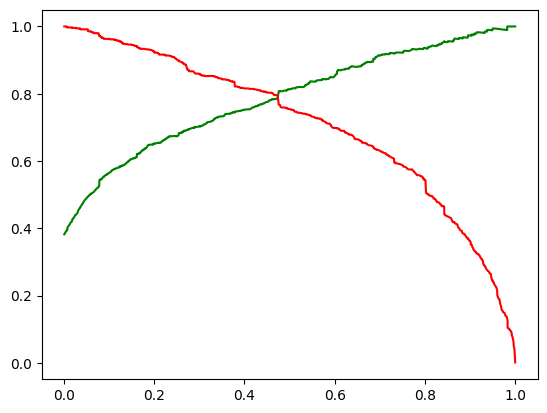

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
# Making prediction using cut off 0.4
y_test_pred_final['final_predicted'] = y_test_pred_final.converted_prob.map(lambda x: 1 if x > 0.48 else 0)
y_test_pred_final.head()

,converted,converted_prob,predicted,final_predicted
8380,0,0.103309,0,0
7707,1,0.947724,1,1
5801,1,0.983104,1,1
3409,0,0.379360,0,0
6830,0,0.062745,0,0


In [131]:
metrics.accuracy_score(y_test_pred_final.converted, y_test_pred_final.final_predicted)

0.8391987005955603

In [132]:
confusion = metrics.confusion_matrix(y_test_pred_final.converted, y_test_pred_final.predicted )
confusion

array([[952, 189],
       [130, 576]], dtype=int64)

In [133]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [134]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7529411764705882

In [135]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8158640226628895

In [136]:
# Calculating the sensitivity
TP/(TP+FN)

0.8158640226628895

In [137]:
# Calculating the specificity
TN/(TN+FP)

0.8343558282208589

## We found that the variables that mattered the most in the potential buyers are :
       Total Time Spent on Website
       Lead Origin : Landing Page Submission 
       Lead Source : Direct Traffic
       Lead Source : Olark Chat
       Lead Source : Reference 
       Do Not Email : Yes
       Last Activity : Olark Chat Conversation 
       Last Activity : SMS Sent
       What is your current occupation : Working Professional
       Last Notable Activity : Modified
       Tags : Closed by Horizzon
       Tags : Interested in other courses 
       Tags : Ringing
       Tags : Will revert after reading the email

making table for easy data intrepretation

In [138]:
result = pd.DataFrame()
result['Cut-offs'] = ('Before plotting graph for cut-off' , 'After plotting graph for cut-off')
result['For train data'] = ('85%' , '83%')
result['For test data'] = ('83%' , '85%')
result

,Cut-offs,For train data,For test data
0,Before plotting graph for cut-off,85%,83%
1,After plotting graph for cut-off,83%,85%
